In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Create a time range at 15 minute intervals for one day
time_range = pd.date_range(start='2023-01-01 00:00:00', end='2023-02-01 23:45:00', freq='15min')

# Create a dictionary to store the columns
columns = {'time': time_range}

# Create 98 additional columns with random integer values between 1 and 100
for i in range(0, 118):
    column_name = 'CRR' + str(i)
    values = np.random.choice([0, np.random.randint(1, 100000)], size=len(time_range), p=[0.98, 0.02])
    columns[column_name] = values

# Create a DataFrame with the time series column and the additional value columns
df = pd.DataFrame(columns)
df.insert(1, 'Date', df['time'].dt.strftime('%Y-%m-%d'))
df.head(1)

,time,Date,CRR0,CRR1,CRR2,CRR3,CRR4,CRR5,CRR6,CRR7,...,CRR108,CRR109,CRR110,CRR111,CRR112,CRR113,CRR114,CRR115,CRR116,CRR117
0,2023-01-01,2023-01-01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
len(df.columns[2:])

118

In [4]:
df.columns[119]

'CRR117'

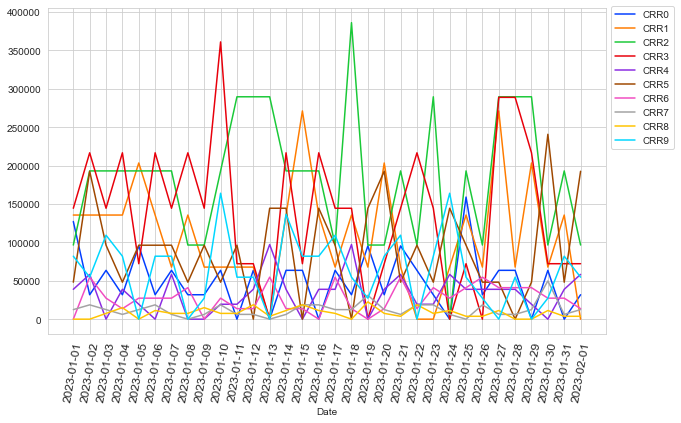

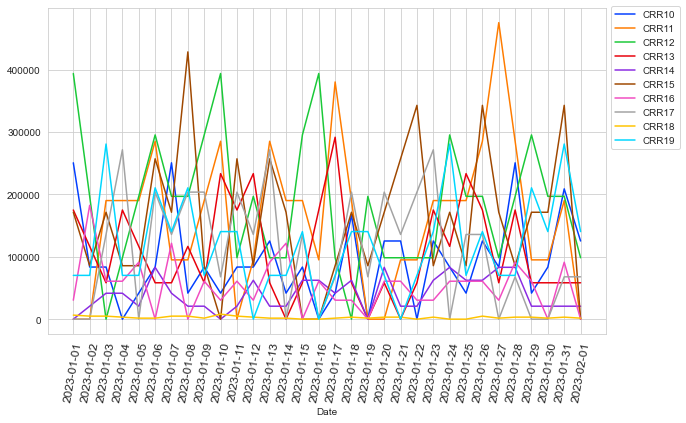

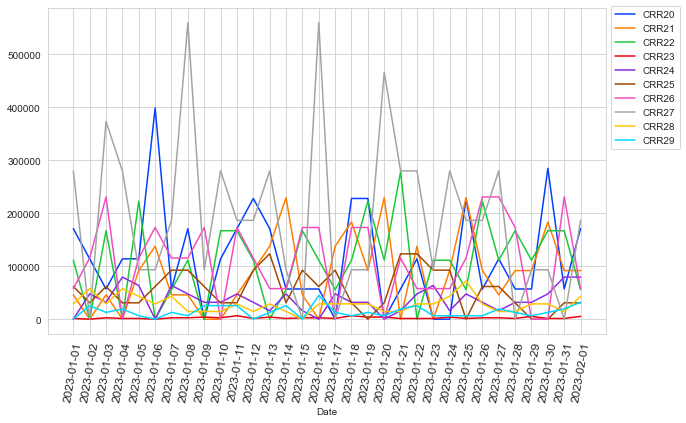

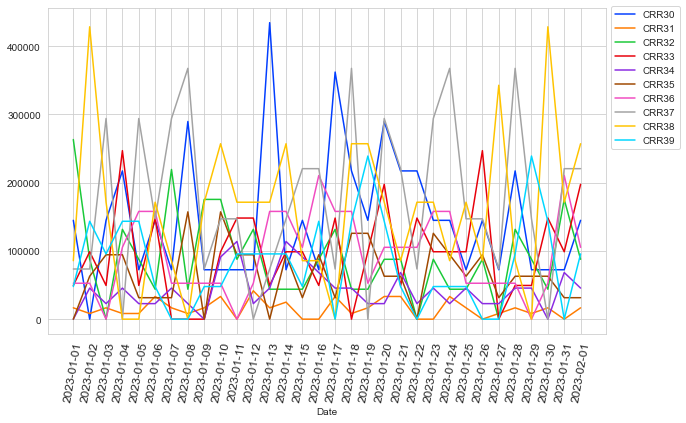

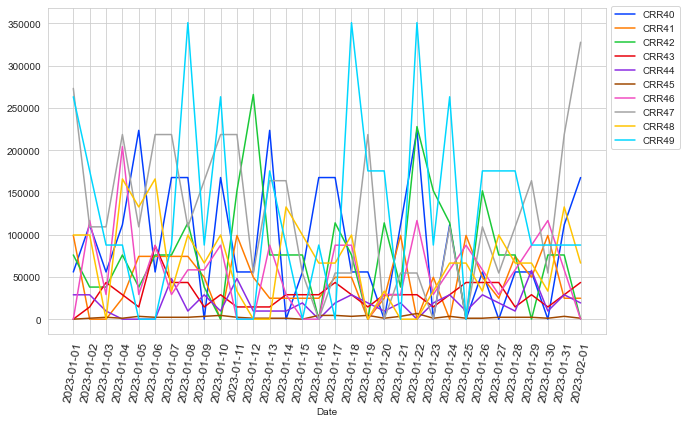

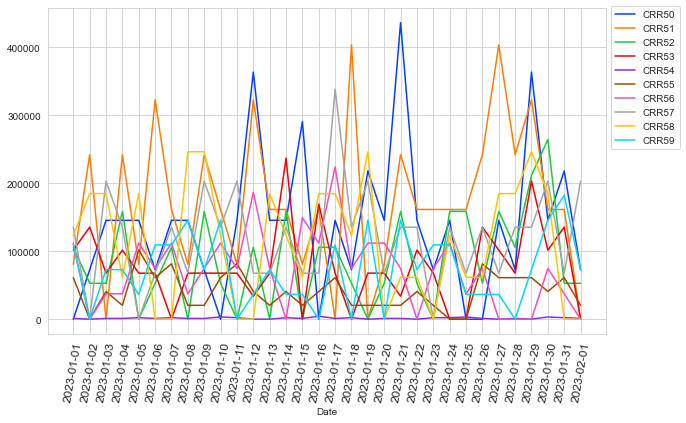

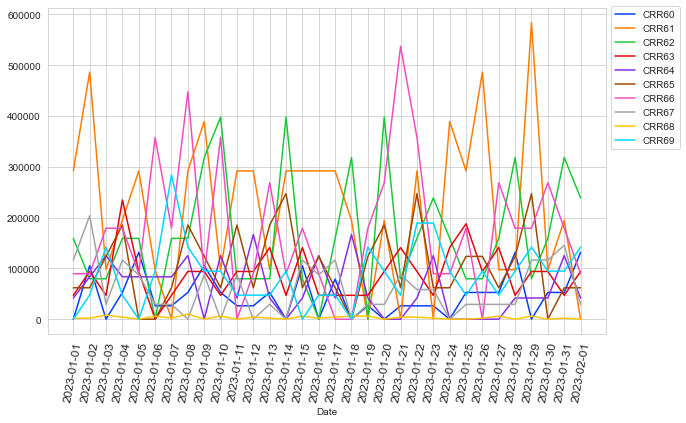

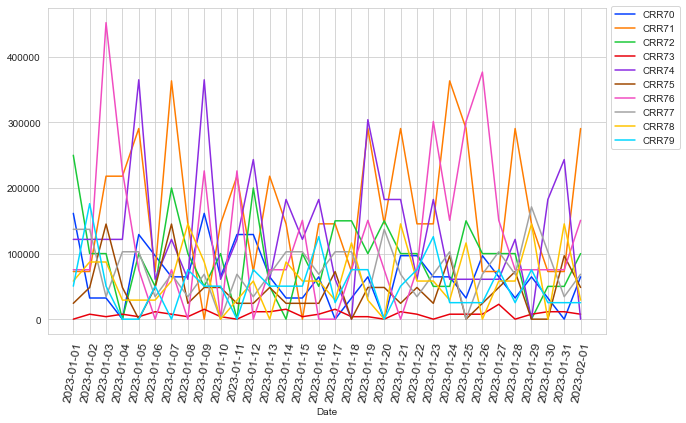

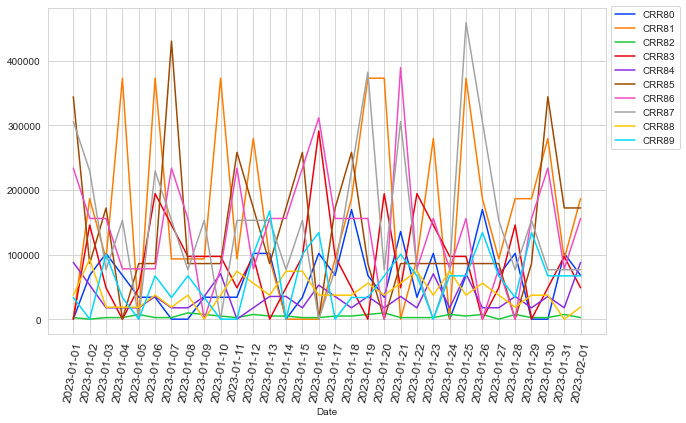

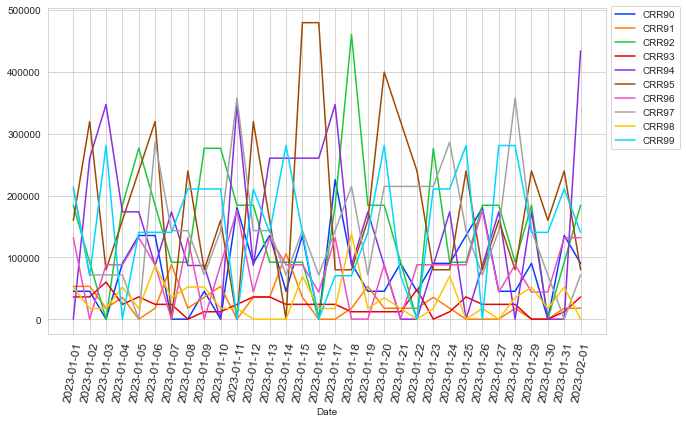

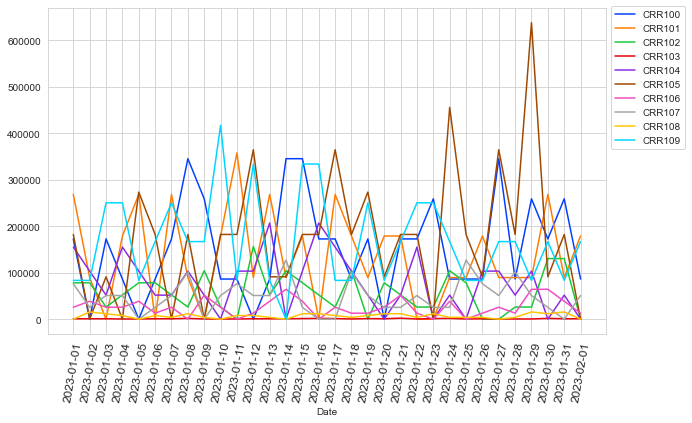

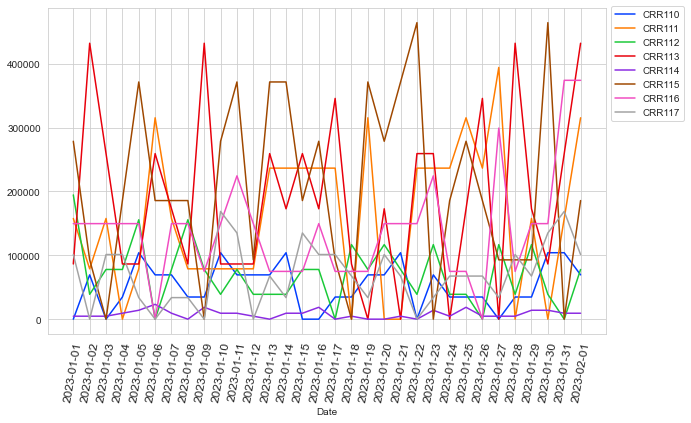

In [5]:
sns.set_style("whitegrid")
sns.set_palette("bright")
plt.set_loglevel('WARNING')
# Loop over each set of 9 columns
for i in range(2, 119, 10):
    fig, ax = plt.subplots(figsize=(10,6))
    # Plot each column in the current set
    for col_name in df.columns[i:i+10]:
        sns.lineplot(ax=ax, data=df, x='Date', y=col_name, estimator=np.sum, label=col_name, ci=None)
    # Add legend and labels
    ax.legend(bbox_to_anchor=(1, 1.02), ncol=1, loc=2)
    plt.xticks(rotation=80, size=12)
    ax.set_xlabel('Date')
    ax.set_ylabel('')
    plt.show()